In [47]:
import yfinance as yf
import segment
import fit
from scipy.stats import linregress, iqr
import numpy as np
import pandas as pd
import fuzzylogic

In [1]:
import zadeh

In [49]:
from matplotlib import pyplot
from fuzzylogic.classes import Domain
from fuzzylogic.functions import R, S, alpha

In [56]:
from fuzzylogic.classes import Domain
from fuzzylogic.functions import alpha, triangular, bounded_linear, trapezoid
from fuzzylogic.hedges import plus, minus, very

## Fuzzy Slope

In [75]:
slope = Domain("slope", -90, 90, res=0.01)

In [76]:
slope.quickly_decreasing = S(-90+11.25, -90+32.5)
slope.decreasing = triangular(-77.5, -35)
slope.slowly_decreasing = triangular(-55, -12.5)
slope.constant = triangular(-32.5, 32.5)
slope.slowly_increasing = triangular(12.5, 55)
slope.increasing = triangular(35, 77.5)
slope.quickly_increasing = R(90-32.5, 90-11.25)

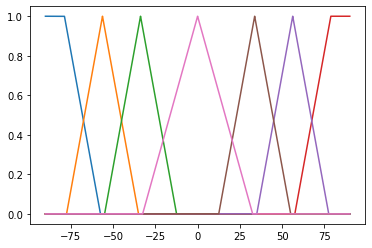

In [77]:
slope.quickly_decreasing.plot()
slope.decreasing.plot()
slope.slowly_decreasing.plot()
slope.quickly_increasing.plot()
slope.increasing.plot()
slope.slowly_increasing.plot()
slope.constant.plot()

In [133]:
series = [i for i in range(90)]
length = len(series)

In [80]:
def fuzzy_slope(series):
    
    total_sum = {'quickly decreasing' : [],
                 'decreasing' : [],
                 'slowly decreasing' : [],
                 'constant' : [],
                 'slowly increasing' : [],
                 'increasing' : [],
                 'quickly increasing' : []}
    
    indexes = {'quickly decreasing' : [],
               'decreasing' : [],
               'slowly decreasing' : [],
               'constant' : [],
               'slowly increasing' : [],
               'increasing' : [],
               'quickly increasing' : []}

    for index, i in enumerate(series):
        total_sum['quickly decreasing'].append(round(slope.quickly_decreasing(i), 2))
        if round(slope.quickly_decreasing(i), 2) > 0:
            indexes['quickly decreasing'].append(index)
            
        total_sum['decreasing'].append(round(slope.decreasing(i), 2))
        if round(slope.decreasing(i), 2) > 0:
            indexes['decreasing'].append(index)
        
        total_sum['slowly decreasing'].append(round(slope.slowly_decreasing(i), 2))
        if round(slope.slowly_decreasing(i), 2) > 0:
            indexes['slowly decreasing'].append(index)
        
        total_sum['constant'].append(round(slope.constant(i), 2))
        if round(slope.constant(i), 2) > 0:
            indexes['constant'].append(index)
            
        total_sum['slowly increasing'].append(round(slope.slowly_increasing(i), 2))
        if round(slope.slowly_increasing(i), 2) > 0:
            indexes['slowly increasing'].append(index)
            
        total_sum['increasing'].append(round(slope.increasing(i), 2))
        if round(slope.increasing(i), 2) > 0:
            indexes['increasing'].append(index)
            
        total_sum['quickly increasing'].append(round(slope.quickly_increasing(i), 2))
        if round(slope.quickly_increasing(i), 2) > 0:
            indexes['quickly increasing'].append(index)
        
    number_of_segments = len(series)
    
    n = 0
    
    for i in total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x)))):
        if i != 0:
            n += 1
    
    return max(total_sum, key = lambda x: sum(total_sum.get(x))), round(sum(total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x))))), 2), round((n/number_of_segments), 2), indexes.get(max(total_sum, key = lambda x: sum(total_sum.get(x))))

In [86]:
fuzzy_slope(series)

('constant', 5.64, 1.0, [0, 1, 2, 3, 4, 5])

In [71]:
indexes = {'quickly decreasing' : [],
           'decreasing' : [],
           'slowly decreasing' : [],
           'constant' : [],
           'slowly increasing' : [],
           'increasing' : [],
           'quickly increasing' : []}

In [81]:
indexes['quickly increasing'].append(2)
indexes

{'quickly decreasing': [],
 'decreasing': [],
 'slowly decreasing': [],
 'constant': [],
 'slowly increasing': [],
 'increasing': [],
 'quickly increasing': [2, 2, 2, 2]}

In [79]:
series

[1, 2, 3, 1, 2, 3]

In [84]:
filtering = fuzzy_slope(series)[3]

## Fuzzy Duration

In [ ]:
'very long' : [],
'long' : [],
'medium' : [],
'short' : [],
'very short' : []
}

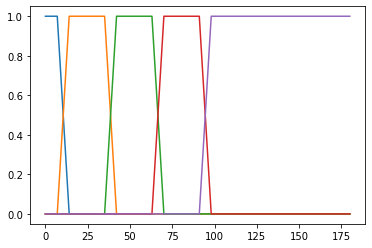

In [62]:
duration = Domain("duration", 0, 180, res=0.01)
duration.very_short = S(0+7, 0+14)
duration.short = trapezoid(7, 14, 35, 42)
duration.medium = trapezoid(35, 42, 42+21, 42+28)
duration.long = trapezoid(63, 70, 70+21, 70+28)
duration.very_long = R(91, 98)
duration.very_short.plot()
duration.short.plot()
duration.medium.plot()
duration.long.plot()
duration.very_long.plot()

In [93]:
def fuzzy_duration(series):
    
    total_sum = {'very short' : [],
                 'short' : [],
                 'medium' : [],
                 'long' : [],
                 'very long' : []}

    for i in series:
        total_sum['very short'].append(round(duration.very_short(i), 2))
        total_sum['short'].append(round(duration.short(i), 2))
        total_sum['medium'].append(round(duration.medium(i), 2))
        total_sum['long'].append(round(duration.long(i), 2))
        total_sum['very long'].append(round(duration.very_long(i), 2))
        
        
    number_of_segments = len(series)
    
    n = 0
    
    for i in total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x)))):
        if i != 0:
            n += 1
    
    return max(total_sum, key = lambda x: sum(total_sum.get(x))), sum(total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x)))))

In [66]:
series

[1, 2, 3, 1, 2, 3]

In [65]:
fuzzy_duration(series)[]

('very_short', 6, 1.0)

In [179]:
fuzzy_slope(series)[0]

'quickly increasing'

In [180]:
def quantifier(value):
    
    quantifier = {
    'Almost all of ' : 0,
    'Most of ' : 0,
    'At least a half of ' : 0,
    'Some of ' : 0,
    'None of ' : 0
    }

    if value > 0.85:
        quantifier['Almost all of '] += 1
    if value > 0.7:
        quantifier['Most of '] += 1
    if value > 0.5:
        quantifier['At least a half of '] += 1
    if value > 0:
        quantifier['Some of '] += 1
    if value == 0:
        quantifier['None of '] += 1

    quantifier = max(quantifier, key = quantifier.get)

    return quantifier 

In [20]:
def summary_fuzzy(series, fuzzy_func, quantifier):
    
    elementA0 = '{{quantifier_related_to_first_variable}}'
    elementA1 = 'trends are '
    elementA2 = '{{slope_variable}}'
    elementA3 = '.'
    
    fuzzy = fuzzy_func(series)[2]
    elementA0 = quantifier(fuzzy)
    elementA2 = fuzzy_func(series)[0]
    
    sentence = elementA0 + elementA1 + elementA2 + elementA3
    
    return sentence

In [5]:
def preprocessing(stock_name='TSLA', period='max'):
    
    '''
    1. Input stock name.
    2. Return historical prices and currency of stock.
    '''

    # get stock data
    hist = yf.Ticker(stock_name)

    # get historical market data
    df = hist.history(period)
    
    currency = hist.info['currency']

    series = list(round(df['Open'], 2))

    return series, currency, df

In [18]:
def suffix(d):
    return 'th' if 11<=d<=13 else {1:'st',2:'nd',3:'rd'}.get(d%10, 'th')

def custom_strftime(t):
    
    format = '%B {S} %Y'
    string_date = t.strftime(format).replace('{S}', str(t.day) + suffix(t.day))
    
    return string_date

In [7]:
def max_price(df):
    
    max_value = 0 
    index = None
    

    for i, value in enumerate(df['Open']):
        if value > max_value:
            max_value = round(value, 2)
            index = df.Open.index[i].date()
            string_date = custom_strftime(index)

    return max_value, string_date

In [8]:
def min_price(df):
    
    min_value = 999999 
    index = 0

    for i, value in enumerate(df['Open']):
        if value < min_value:
            min_value = round(value, 2)
            index = df.Open.index[i].date()
            string_date = custom_strftime(index)

    return min_value, string_date

In [9]:
def min_date(df):
    
    date = custom_strftime(df.index.min())

    return date

In [10]:
def max_date(df):
    
    date = custom_strftime(df.index.max())

    return date

In [11]:
def summary_price(df):
    
    opening = 'During the time period of '
    mindate = min_date(df)
    maxdate = max_date(df)
    glue = ' and '
    date_element = ' the stock price peaked at '
    max_value = max_price(df)[0]
    glue_2 = ' on '
    date_1 = max_price(df)[1]
    glue_3 = ' and hit its lowest value of '
    min_value = min_price(df)[0]
    glue_4 = ' on '
    date_2 = min_price(df)[1]
    eos = '.'
    
    sentence0 = opening + mindate + glue + maxdate + date_element + str(max_value) + glue_2 + date_1 + glue_3 \
                + str(min_value) + glue_4 + date_2 + eos
    
    return sentence0

In [15]:
data = yf.Ticker('TSLA')
tickerDF = data.history(interval = '1d', start = '2020-01-01', end = '2021-01-01')
tickerDF.index.min()

Timestamp('2020-01-02 00:00:00')

In [19]:
summary_price(tickerDF)

'During the time period of January 2nd 2020 and December 31st 2020 the stock price peaked at 699.99 on December 31st 2020 and hit its lowest value of 74.94 on March 19th 2020.'

## Level 2

In [31]:
start_date = '2010-06-30'
end_date = '2021-06-17'
max_error = 100

def segment_detection(df, start_date, end_date, max_error):
    
    start = df.index.get_loc(start_date)
    end = df.index.get_loc(end_date)
    data = list(round(df.Close, 2))
    segments = segment.bottomupsegment(data[start:end], fit.interpolate, fit.sumsquared_error, max_error)
    
    return segments, data[start:end]

In [32]:
segments, data = segment_detection(df, start_date, end_date, max_error)

168


In [83]:
def duration(series, filtering):
    '''
    1. Input segment series.
    2. Return segment-specific duration.
    '''
    duration_series = []
    for segment in series:
        if segment not in filtering:
            start, _, end, _ = segment
            length = end-start
            duration_series.append(length)
    return duration_series

In [85]:
duration(series, filtering)

[]

In [22]:
# calculate variability
def variability(data, segments, filtering):
    '''
    1. Input value range as array.
    2. Return interquartile range.
    '''
    variability_series = []
    for segment in segments:
        if segment not in filtering:
            start, _, end, _ = segment
            x = np.array(data[start:end+1])
            segment_iqr = round(iqr(x), 4)
            variability_series.append(segment_iqr)
    return variability_series

In [97]:
def summary_L2(func_L1, func_L2, func_L3, series):
    
    filtered_series = func_L1(series)[3]
    
    element1 = func_L1(series)[0]
    element2 = ' trends are '
    element3 = 'VARIABLE1'
    element4 = ' and '
    element5 = 'VARIABLE2'
    eos = '.'
    
    series_preprocessed = func_L2(series, filtered_series)
    element3 = func_L3(series_preprocessed)[0]
    
    sentence = element1 + element2 + element3 + eos
    
    return sentence

In [98]:
summary_L2(fuzzy_slope, duration, fuzzy_duration, series)

'constant trends are very short.'

In [35]:
def max_duration(series):
    
    dict_duration = {
    'very long' : [],
    'long' : [],
    'medium' : [],
    'short' : [],
    'very short' : []
    }
    
    for i, segment in enumerate(series):
        if segment <= np.quantile(series, 1/5):
            dict_duration['very short'].append(i)
        if segment > np.quantile(series, 1/5) and segment <= np.quantile(series, 2/5):
            dict_duration['short'].append(i)
        if segment > np.quantile(series, 2/5) and segment <= np.quantile(series, 3/5):
            dict_duration['medium'].append(i)
        if segment > np.quantile(series, 3/5) and segment <= np.quantile(series, 4/5):
            dict_duration['long'].append(i)
        if segment > np.quantile(series, 4/5):
            dict_duration['very long'].append(i)
            
    return max(dict_duration, key = lambda x: len(dict_duration.get(x))), dict_duration

In [44]:
series = [1, 2, 3, 1, 2, 3]

In [45]:
max_duration(series)

('long',
 {'very long': [],
  'long': [2, 5],
  'medium': [],
  'short': [1, 4],
  'very short': [0, 3]})

In [ ]:
series_A = [1, 2, 3, 4,   5,   1,   2,  3, 4, 5, 1, 2]
series_B = [1, 1, 1, 1, 100, 100, 100, 12, 1, 1, 1, 1]